## Data Collection

In [15]:
import requests
import pandas as pd
from datetime import datetime

In [16]:
USER = "umeshrai01"

In [17]:
def get_repos(user):
    url = f"https://api.github.com/users/{user}/repos"
    res = requests.get(url)
    return res.json()

In [18]:
repos = get_repos(USER)

In [19]:
repo_data = []

for r in repos:
    repo_data.append({
        "name": r["name"],
        "created_at": r["created_at"],
        "language": r["language"],
        "stars": r["stargazers_count"],
        "forks": r["forks_count"]
    })

In [20]:
df_repos = pd.DataFrame(repo_data)
df_repos.to_csv("repos.csv", index=False)

In [21]:
df_repos.head(20)

,name,created_at,language,stars,forks
0,ai-app-builder,2026-01-20T04:01:30Z,Python,0,0
1,assignment_tds,2025-05-14T02:49:53Z,None,0,0
2,breakup_recovery,2025-11-20T08:17:50Z,Python,0,0
3,breast_cancer_prediction,2024-11-09T23:26:22Z,Jupyter Notebook,0,0
4,customer_segmentation_netflix,2026-02-06T13:14:14Z,Jupyter Notebook,0,0
5,Employee-directory,2024-12-17T19:09:22Z,JavaScript,0,0
6,employee_directory,2025-01-01T16:05:50Z,Python,0,0
7,Ikea-global-sales-insights,2025-09-10T08:37:14Z,HTML,0,0
8,ipl-match-prediction,2025-11-11T17:57:27Z,Python,0,0
9,portfolio,2024-10-30T08:45:45Z,HTML,0,0


In [22]:
def get_commits(repo):
    url = f"https://api.github.com/repos/{USER}/{repo}/commits"
    res = requests.get(url)
    return res.json()

In [23]:
commit_list = []

for repo in df_repos["name"]:
    commits = get_commits(repo)

    for c in commits:
        try:
            commit_list.append({
                "repo": repo,
                "date": c["commit"]["author"]["date"],
                "message": c["commit"]["message"]
            })
        except:
            pass

In [24]:
df_commits = pd.DataFrame(commit_list)
df_commits.to_csv("commits.csv", index=False)

print("Data collection done!")

Data collection done!


## Statistical Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
commits = pd.read_csv("commits.csv")

commits["date"] = pd.to_datetime(commits["date"])
commits["day"] = commits["date"].dt.date
commits["hour"] = commits["date"].dt.hour

In [27]:
daily = commits.groupby("day").size()

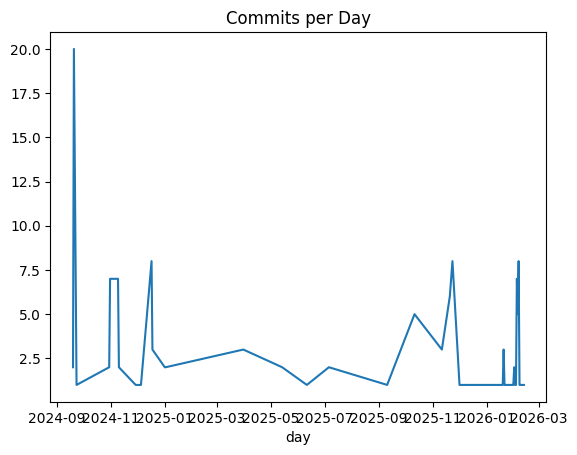

In [28]:
plt.figure()
daily.plot(title="Commits per Day")
plt.show()

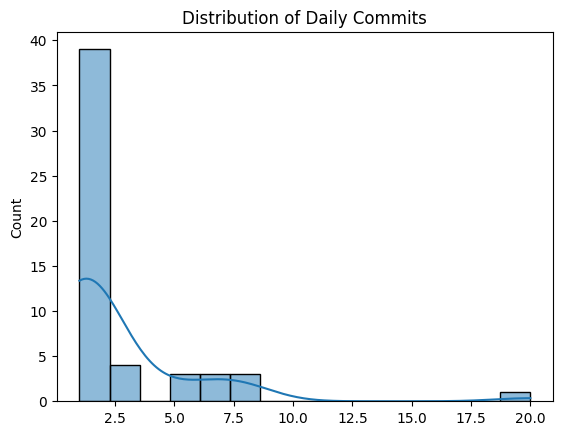

In [29]:
plt.figure()
sns.histplot(daily, kde=True)
plt.title("Distribution of Daily Commits")
plt.show()

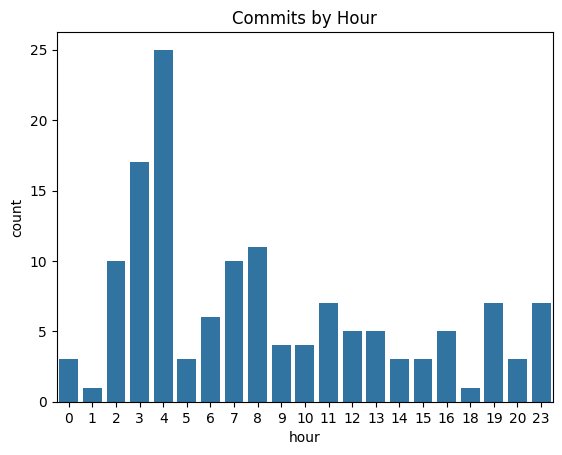

In [30]:
plt.figure()
sns.countplot(x="hour", data=commits)
plt.title("Commits by Hour")
plt.show()


In [31]:
commits["msg_len"] = commits["message"].str.len()

corr = commits[["hour","msg_len"]].corr()

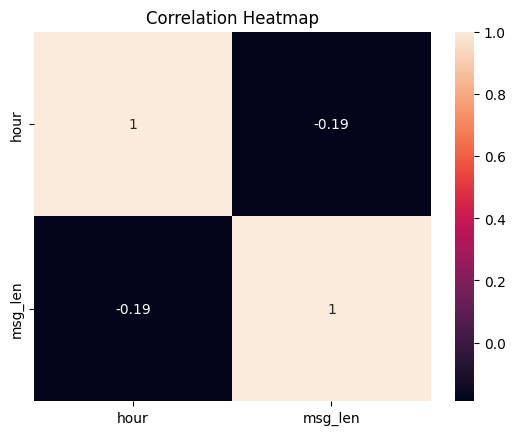

In [32]:
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Model Building - Clustering

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [34]:
X = commits[["hour","msg_len"]].fillna(0)

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
k = KMeans(n_clusters=3)
commits["cluster"] = k.fit_predict(X_scaled)

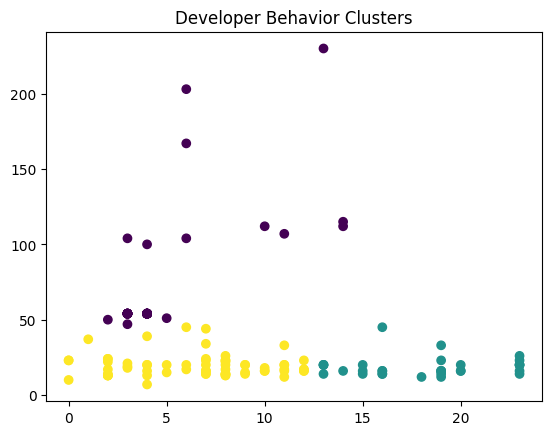

In [37]:
plt.scatter(commits["hour"], commits["msg_len"], c=commits["cluster"])
plt.title("Developer Behavior Clusters")
plt.show()

## Model Building - Forcasting

In [38]:
from prophet import Prophet

/Users/umeshkumarrai/Developer/neul_project/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [39]:
df = daily.reset_index()
df.columns = ["ds","y"]

In [40]:
m = Prophet()
m.fit(df)

10:45:37 - cmdstanpy - INFO - Chain [1] start processing
10:45:38 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future = m.make_future_dataframe(14)
forecast = m.predict(future)

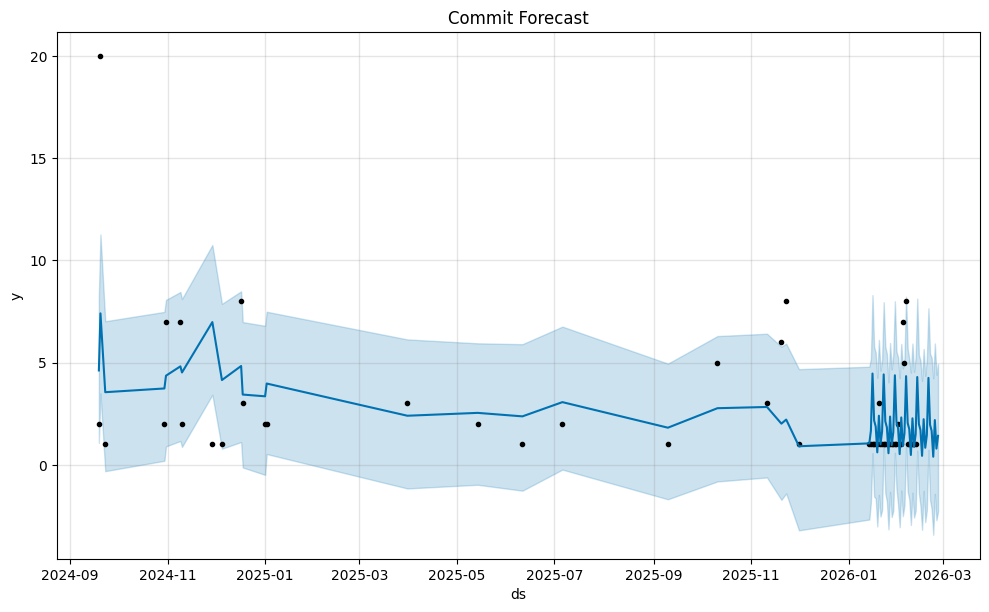

In [42]:
m.plot(forecast)
plt.title("Commit Forecast")
plt.show()

In [43]:
!pip install streamlit


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [44]:
import streamlit as st

2026-02-12 10:45:42.189 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 10:45:42.303 
  command:

    streamlit run /Users/umeshkumarrai/Developer/neul_project/venv/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2026-02-12 10:45:42.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 10:45:42.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 10:45:42.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 10:45:42.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 10:45:42.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 1

DeltaGenerator()